In [1]:
import pandas as pd
file_path = '/content/80_Audio_files.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [2]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
2,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn
3,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn
4,100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn
...,...,...,...,...,...,...,...,...
75,135526-6-2-0.wav,135526,6.457848,9.045825,1,3,6,gun_shot
76,135526-6-3-0.wav,135526,9.045825,10.569587,1,3,6,gun_shot
77,135526-6-4-0.wav,135526,10.569587,12.359403,1,3,6,gun_shot
78,135526-6-5-0.wav,135526,12.359403,14.657139,1,3,6,gun_shot


In [3]:
import librosa
import matplotlib.pyplot as plt

In [5]:
#/content/sample_data/Audio_files
# /content/sample_data/Audio_files/100032-3-0-0.wav

In [8]:
import os
import shutil

In [10]:
audio_df = df.copy()

In [ ]:
# Define a dictionary that maps class IDs to class labels
class_labels = {
    1: 'Class A',
    3: 'Class B',
    4: 'Class C',
    6: 'Class D'
}

# Add a new 'class_label' column to the DataFrame based on 'classID'
audio_df['class_label'] = audio_df['classID'].map(class_labels)

audio_df


In [ ]:

import matplotlib.pyplot as plt

class_A_data = audio_df[audio_df['classID'] == 1]
class_B_data = audio_df[audio_df['classID'] == 3]
class_C_data = audio_df[audio_df['classID'] == 4]
class_D_data = audio_df[audio_df['classID'] == 6]


# Directory path to your audio files
audio_dir = '/content/sample_data/Audio_files/'

# Function to generate a frequency plot
def generate_frequency_plot(audio_file_path, class_label):
    y, sr = librosa.load(audio_file_path)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Audio File: {class_label}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()



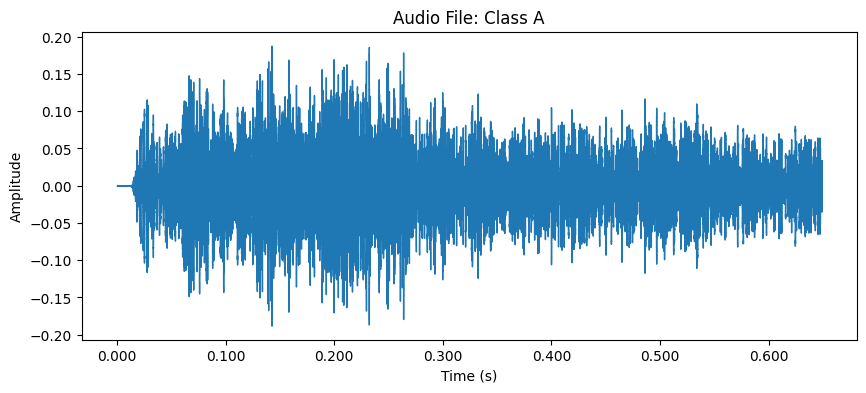

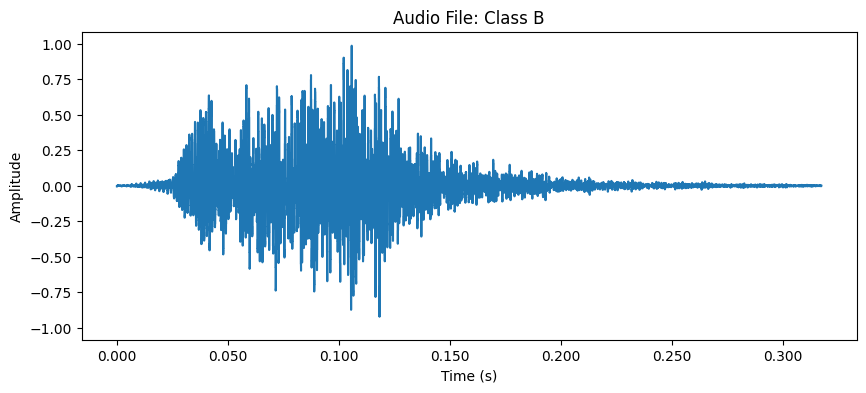

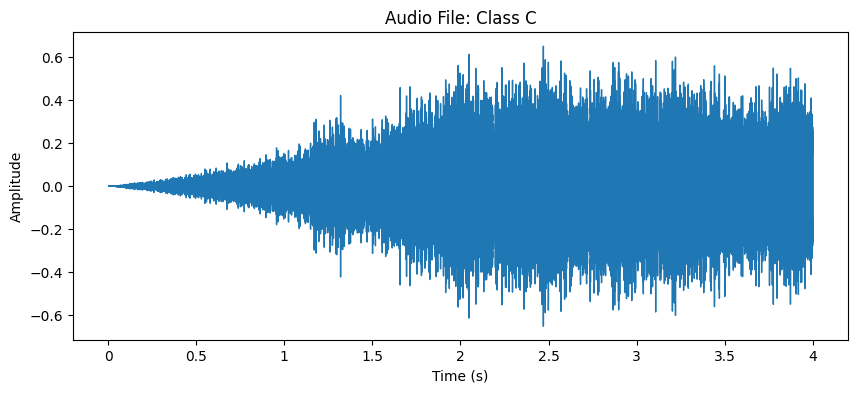

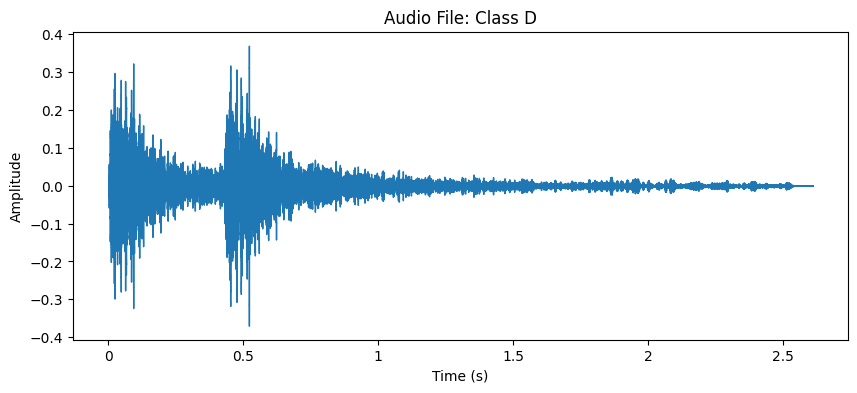

In [26]:
# Plot one file from class A
if not class_A_data.empty:
    row = class_A_data.iloc[0]
    audio_file_path = os.path.join(audio_dir, row['slice_file_name'])
    generate_frequency_plot(audio_file_path, 'Class A')

# Plot one file from class B
if not class_B_data.empty:
    row = class_B_data.iloc[0]
    audio_file_path = os.path.join(audio_dir, row['slice_file_name'])
    generate_frequency_plot(audio_file_path, 'Class B')

# Plot one file from class C
if not class_C_data.empty:
    row = class_C_data.iloc[0]
    audio_file_path = os.path.join(audio_dir, row['slice_file_name'])
    generate_frequency_plot(audio_file_path, 'Class C')

# Plot one file from class D
if not class_D_data.empty:
    row = class_D_data.iloc[0]
    audio_file_path = os.path.join(audio_dir, row['slice_file_name'])
    generate_frequency_plot(audio_file_path, 'Class D')

In [16]:
import numpy as np


In [ ]:
# Path to the directory containing audio files
audio_dir = '/content/sample_data/Audio_files/'

# Function to extract features from an audio file
def extract_features(audio_file_path, class_label, slice_file_name):
    try:
        # Load the audio file
        y, sr = librosa.load(audio_file_path)

        # Extract statistical and frequency-domain features
        statistical_features = {
            'mean': np.mean(y),
            'std': np.std(y),
            'max': np.max(y),
            'min': np.min(y)
        }

        # Calculate Short-Time Fourier Transform (STFT)
        stft = np.abs(librosa.stft(y))

        # Extract frequency domain features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

        frequency_features = {
            'spectral_centroid': np.mean(librosa.feature.spectral_centroid(S=stft)),
            'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(S=stft)),
            'spectral_contrast': np.mean(librosa.feature.spectral_contrast(S=stft)),
            'spectral_rolloff': np.mean(librosa.feature.spectral_rolloff(S=stft)),
            'chroma_stft_mean': np.mean(chroma_stft),
            'chroma_stft_std': np.std(chroma_stft),
            'chroma_cqt_mean': np.mean(chroma_cqt),
            'chroma_cqt_std': np.std(chroma_cqt)
        }

        features = {
            'slice_file_name': slice_file_name,
            **statistical_features,
            **frequency_features,
            'class_label': class_label
        }

        return features
    except Exception as e:
        print(f"Error processing {audio_file_path}: {str(e)}")
        return None

# Initialize an empty list to store the extracted features
all_features = []

for _, row in audio_df.iterrows():
    audio_file_path = os.path.join(audio_dir, row['slice_file_name'])
    class_label = row['class_label']
    slice_file_name = row['slice_file_name']

    # Extract features for the audio file
    features = extract_features(audio_file_path, class_label, slice_file_name)

    if features:
        all_features.append(features)

# Create a DataFrame from the extracted features
feature_df = pd.DataFrame(all_features)

# Remove columns with empty values (NaN)
feature_df = feature_df.dropna(axis=1, how='all')

print("Features extracted")


In [25]:

feature_df.to_csv('/content/sample_data/audio_features.csv', index=False)


In [24]:
feature_df

,slice_file_name,mean,std,max,min,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,chroma_stft_mean,chroma_stft_std,chroma_cqt_mean,chroma_cqt_std,class_label
0,100032-3-0-0.wav,-0.000005,0.164392,0.985863,-0.922604,2089.849970,1736.189570,21.619562,2875.451660,0.342925,0.294806,0.523729,0.241038,Class B
1,100648-1-0-0.wav,-0.000011,0.043128,0.188049,-0.170057,2244.903032,2582.639460,21.211027,5062.225342,0.353848,0.288220,0.571239,0.204085,Class A
2,100648-1-1-0.wav,0.000002,0.032624,0.145582,-0.153230,2287.902157,2399.048089,21.647817,4566.911515,0.483272,0.262234,0.671517,0.194962,Class A
3,100648-1-2-0.wav,-0.000025,0.043887,0.200908,-0.192692,2658.458057,2435.765998,22.768787,5074.658203,0.351821,0.309871,0.648673,0.198138,Class A
4,100648-1-3-0.wav,0.000001,0.028336,0.150907,-0.144967,2428.110529,2416.151431,21.278362,4858.813477,0.497890,0.244529,0.707808,0.163009,Class A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,135526-6-2-0.wav,0.000348,0.222605,1.291449,-1.301368,1654.534101,1843.421309,18.790506,3124.525452,0.625624,0.213910,0.753713,0.144733,Class D
76,135526-6-3-0.wav,0.000172,0.225994,1.212988,-1.070567,1446.788732,1605.182892,19.181539,2667.180842,0.619726,0.217789,0.759901,0.148587,Class D
77,135526-6-4-0.wav,0.000625,0.230095,1.273506,-1.234832,1564.677248,1700.365060,19.007928,2933.898926,0.604071,0.220797,0.750059,0.154392,Class D
78,135526-6-5-0.wav,0.000709,0.240349,1.310274,-1.161408,1647.072574,1758.307986,18.997302,3110.134055,0.623425,0.213133,0.762501,0.143343,Class D
